- Importing Libraries

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

 - Data is given as a csv file and importing into python environment.

In [12]:
data=pd.read_csv(r'C:\Users\GOKUL BABU K\Downloads\Add_sales_data_2018.csv')

- checking data is imported to Python environment by printing the data.

In [13]:
data.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


- checking the basic information of the data

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  205 non-null    object 
 1   Add1(in Thousands)    205 non-null    float64
 2   Add2(in Thousands)    205 non-null    float64
 3   Add3(in Thousands)    205 non-null    float64
 4   Add4(in Thousands)    205 non-null    float64
 5   Add5(in Thousands)    205 non-null    float64
 6   Profit(in Thousands)  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


- Insight : There are 7 columns and 205 entries

In [21]:
#- Checking for null values
data.isna().sum()

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

- No null values

# 1. First of all, check whether there is any relationship between the amount spent for advertising through five different companies and profit generated.

<AxesSubplot:>

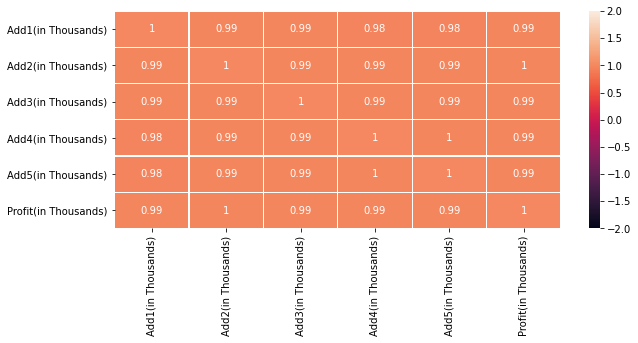

In [16]:
corrvalue = data.corr()
plt.subplots(figsize=(10,4))
sns.heatmap(corrvalue,vmin=-2,vmax=2,annot=True,linewidth=0.2)

- Insight : High correlation is there between the amount spent and profit generated

# 2. Build a regression model to predict the profit from the given data and comment your findings on it.

In [22]:
#- Displaying the columns in the dataset.
data.columns

Index(['Date', 'Add1(in Thousands)', 'Add2(in Thousands)',
       'Add3(in Thousands)', 'Add4(in Thousands)', 'Add5(in Thousands)',
       'Profit(in Thousands)'],
      dtype='object')

In [23]:
# Removing date column from the data
data1 = data.drop(['Date'],axis=1)

In [24]:
# Verifying the data
data1.columns

Index(['Add1(in Thousands)', 'Add2(in Thousands)', 'Add3(in Thousands)',
       'Add4(in Thousands)', 'Add5(in Thousands)', 'Profit(in Thousands)'],
      dtype='object')

In [27]:
# Seperating in to x and y
y = data1['Profit(in Thousands)']
x = data1.drop(['Profit(in Thousands)'],axis=1)

In [28]:
# importing train_test_split library
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.25)

In [32]:
# Importing linear model
from sklearn import linear_model
lr = linear_model.LinearRegression()

In [33]:
# Creating the model
model = lr.fit(x_train,y_train)

In [34]:
# Predicting with the test values.
predictions = model.predict(x_test)

In [35]:
predictions

array([4152.066, 4446.441, 5131.898, 4907.56 , 5004.282, 4623.793,
       5384.175, 5328.025, 5175.051, 5956.323, 5780.799, 4997.719,
       5075.858, 5784.54 , 4936.12 , 5065.652, 4190.965, 5034.726,
       5015.536, 5134.657, 5145.131, 5421.94 , 4569.293, 4598.292,
       4436.321, 4175.677, 5616.791, 5667.25 , 4648.834, 5717.838,
       5001.615, 5182.368, 5017.503, 5545.013, 5013.207, 5030.451,
       5108.626, 4760.877, 4606.34 , 4925.861, 5250.788, 5038.222,
       5491.792, 5019.997, 4647.356, 4486.38 , 4435.174, 5300.437,
       5425.19 , 4482.183, 4193.095, 6062.457])

In [36]:
# Calculating Mean Square Error to find the accuracy of the model
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,predictions)

5.408488620539027e-25

- Insight : Mean square error is neglogible value and the model is perfect for the accurate predictions

# 3. Predict the profit generated by the company, if they wish to spend the following amount for advertisement.

In [44]:
# Creating a dataframe with given values
data2 = {'Add1(in Thousands)':[290],
        'Add2(in Thousands)':[312],
        'Add3(in Thousands)':[309],
        'Add4(in Thousands)':[298],
        'Add5(in Thousands)':[320]}
  
df = pd.DataFrame(data2)

In [45]:
# Checking the data
df

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands)
0,290,312,309,298,320


In [46]:
#Preding the profit with the created model

prediction1=model.predict(df)

In [48]:
print("Profit with given expenditure is", prediction1)

Profit with given expenditure is [5820.06]
